# Awal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
import scipy.stats as stats
from scipy.stats import kstest
import seaborn as sns
import matplotlib.patches as mpatches

In [3]:
traincsv = files.upload()

Saving train.csv to train.csv


In [119]:
testcsv = files.upload()  

Saving test.csv to test (1).csv


In [120]:
train = pd.read_csv(io.BytesIO(traincsv['train.csv']))

In [121]:
test = pd.read_csv(io.BytesIO(testcsv['test.csv']))

In [122]:
train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


In [123]:
test.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji
0,20049,NaN,Laki-laki,2.119406,Senior,NaN,Belum Menikah,technical,137.0,0.38,0.372242,2,36 Months,belum pernah,belum,rendah
1,20050,31.0,Laki-laki,2.554876,Part-Time,NaN,Sudah Menikah,sales,258.0,0.85,0.334727,3,3 Years,belum pernah,belum,sedang
2,20051,NaN,Laki-laki,1.151644,Probation,NaN,Sudah Menikah,marketing,257.0,0.91,0.459594,3,36 Months,belum pernah,belum,sedang
3,20052,NaN,Perempuan,1.963498,Senior,NaN,Belum Menikah,sales,142.0,0.42,0.370912,2,3 Years,belum pernah,belum,rendah
4,20053,NaN,Perempuan,1.666068,Junior,2007.0,Belum Menikah,sales,272.0,0.93,0.563354,3,2 Years,pernah,belum,rendah


In [124]:
train.describe()

,employee_id,umur,IPK,tahun_lulus,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,resign
count,10049.000000,2338.000000,10049.000000,2338.000000,8700.000000,9253.000000,8499.000000,10049.000000,10049.000000
mean,15024.000000,33.499572,2.396161,2008.151839,202.981379,0.611906,0.455847,3.797691,0.238034
std,2901.040762,7.951891,0.868485,7.988843,56.708467,0.247945,0.113812,1.227331,0.425901
min,10000.000000,20.000000,0.003057,1986.000000,96.000000,0.090000,0.000000,2.000000,0.000000
25%,12512.000000,27.000000,1.778721,2003.000000,156.000000,0.440000,0.382326,3.000000,0.000000
50%,15024.000000,32.000000,2.523730,2009.000000,200.000000,0.640000,0.448720,4.000000,0.000000
75%,17536.000000,39.000000,3.091618,2015.000000,246.000000,0.810000,0.522630,5.000000,0.000000
max,20048.000000,55.000000,3.989568,2024.000000,559.000000,1.000000,1.000000,7.000000,1.000000


In [125]:
test.describe()

,employee_id,umur,IPK,tahun_lulus,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan
count,4950.000000,1070.000000,4950.000000,1151.000000,4362.000000,4484.000000,4094.000000,4950.000000
mean,22523.500000,32.106542,2.192240,2008.136403,203.649243,0.612132,0.455039,3.813939
std,1429.086247,8.220753,0.849280,7.847547,53.969888,0.249748,0.111901,1.243259
min,20049.000000,20.000000,0.070343,1985.000000,97.000000,0.090000,0.003120,2.000000
25%,21286.250000,26.000000,1.582960,2003.000000,157.000000,0.440000,0.381316,3.000000
50%,22523.500000,31.000000,2.274299,2009.000000,202.000000,0.640000,0.450842,4.000000
75%,23760.750000,37.000000,2.830191,2014.000000,246.000000,0.820000,0.522663,5.000000
max,24998.000000,55.000000,3.950760,2023.000000,559.000000,1.000000,0.918187,7.000000


In [126]:
train.duplicated().any()

False

In [127]:
train.isna().sum()

employee_id                         0
umur                             7711
jenis_kelamin                       0
IPK                                 0
level                               0
tahun_lulus                      7711
status_perkawinan                   0
divisi                              0
rerata_jam_bulanan               1349
tingkat_kepuasan_bekerja          796
nilai_evaluasi_terakhir          1550
jumlah_proyek_yang_dikerjakan       0
lama_di_perusahaan                  0
kecelakaan_kerja                    0
promosi_5thn_lalu                   0
tingkat_gaji                        0
resign                              0
dtype: int64

In [128]:
train.dtypes

employee_id                        int64
umur                             float64
jenis_kelamin                     object
IPK                              float64
level                             object
tahun_lulus                      float64
status_perkawinan                 object
divisi                            object
rerata_jam_bulanan               float64
tingkat_kepuasan_bekerja         float64
nilai_evaluasi_terakhir          float64
jumlah_proyek_yang_dikerjakan      int64
lama_di_perusahaan                object
kecelakaan_kerja                  object
promosi_5thn_lalu                 object
tingkat_gaji                      object
resign                             int64
dtype: object

In [129]:
train.shape

(10049, 17)

In [130]:
#Buat kolom baru lama di perusahaan numerik - train
length = len(train['employee_id'])
train = train.assign(lama_di_perusahaan_num=pd.Series(np.random.randn(length)).values)

In [131]:
#Buat kolom baru lama di perusahaan numerik - test
lengthtest = len(test['employee_id'])
test = test.assign(lama_di_perusahaan_num=pd.Series(np.random.randn(lengthtest)).values)

In [132]:
#Mengisi lama di perusahaan numerik - train
for i in range(len(train)):
    if (train["lama_di_perusahaan"][i]=="10 Years"):
        train["lama_di_perusahaan_num"][i] = 120
    if (train["lama_di_perusahaan"][i]=="2 Years"):
        train["lama_di_perusahaan_num"][i] = 24
    if (train["lama_di_perusahaan"][i]=="3 Years"):
        train["lama_di_perusahaan_num"][i] = 36
    if (train["lama_di_perusahaan"][i]=="4 Years"):
        train["lama_di_perusahaan_num"][i] = 48
    if (train["lama_di_perusahaan"][i]=="5 Years"):
        train["lama_di_perusahaan_num"][i] = 60
    if (train["lama_di_perusahaan"][i]=="6 Years"):
        train["lama_di_perusahaan_num"][i] = 72
    if (train["lama_di_perusahaan"][i]=="7 Years"):
        train["lama_di_perusahaan_num"][i] = 84
    if (train["lama_di_perusahaan"][i]=="8 Years"):
        train["lama_di_perusahaan_num"][i] = 96
    if (train["lama_di_perusahaan"][i]=="120 Months"):
        train["lama_di_perusahaan_num"][i] = 120
    if (train["lama_di_perusahaan"][i]=="24 Months"):
        train["lama_di_perusahaan_num"][i] = 24
    if (train["lama_di_perusahaan"][i]=="36 Months"):
        train["lama_di_perusahaan_num"][i] = 36
    if (train["lama_di_perusahaan"][i]=="48 Months"):
        train["lama_di_perusahaan_num"][i] = 48
    if (train["lama_di_perusahaan"][i]=="60 Months"):
        train["lama_di_perusahaan_num"][i] = 60
    if (train["lama_di_perusahaan"][i]=="72 Months"):
        train["lama_di_perusahaan_num"][i] = 72
    if (train["lama_di_perusahaan"][i]=="84 Months"):
        train["lama_di_perusahaan_num"][i] = 84
    if (train["lama_di_perusahaan"][i]=="96 Months"):
        train["lama_di_perusahaan_num"][i] = 96

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying 

In [133]:
#Mengisi lama di perusahaan numerik - test
for i in range(len(test)):
    if (test["lama_di_perusahaan"][i]=="10 Years"):
        test["lama_di_perusahaan_num"][i] = 120
    if (test["lama_di_perusahaan"][i]=="2 Years"):
        test["lama_di_perusahaan_num"][i] = 24
    if (test["lama_di_perusahaan"][i]=="3 Years"):
        test["lama_di_perusahaan_num"][i] = 36
    if (test["lama_di_perusahaan"][i]=="4 Years"):
        test["lama_di_perusahaan_num"][i] = 48
    if (test["lama_di_perusahaan"][i]=="5 Years"):
        test["lama_di_perusahaan_num"][i] = 60
    if (test["lama_di_perusahaan"][i]=="6 Years"):
        test["lama_di_perusahaan_num"][i] = 72
    if (test["lama_di_perusahaan"][i]=="7 Years"):
        test["lama_di_perusahaan_num"][i] = 84
    if (test["lama_di_perusahaan"][i]=="8 Years"):
        test["lama_di_perusahaan_num"][i] = 96
    if (test["lama_di_perusahaan"][i]=="120 Months"):
        test["lama_di_perusahaan_num"][i] = 120
    if (test["lama_di_perusahaan"][i]=="24 Months"):
        test["lama_di_perusahaan_num"][i] = 24
    if (test["lama_di_perusahaan"][i]=="36 Months"):
        test["lama_di_perusahaan_num"][i] = 36
    if (test["lama_di_perusahaan"][i]=="48 Months"):
        test["lama_di_perusahaan_num"][i] = 48
    if (test["lama_di_perusahaan"][i]=="60 Months"):
        test["lama_di_perusahaan_num"][i] = 60
    if (test["lama_di_perusahaan"][i]=="72 Months"):
        test["lama_di_perusahaan_num"][i] = 72
    if (test["lama_di_perusahaan"][i]=="84 Months"):
        test["lama_di_perusahaan_num"][i] = 84
    if (test["lama_di_perusahaan"][i]=="96 Months"):
        test["lama_di_perusahaan_num"][i] = 96

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying 

In [134]:
train.head()

,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign,lama_di_perusahaan_num
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0,36.0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0,24.0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0,24.0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0,36.0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0,36.0


In [135]:
train.dtypes

employee_id                        int64
umur                             float64
jenis_kelamin                     object
IPK                              float64
level                             object
tahun_lulus                      float64
status_perkawinan                 object
divisi                            object
rerata_jam_bulanan               float64
tingkat_kepuasan_bekerja         float64
nilai_evaluasi_terakhir          float64
jumlah_proyek_yang_dikerjakan      int64
lama_di_perusahaan                object
kecelakaan_kerja                  object
promosi_5thn_lalu                 object
tingkat_gaji                      object
resign                             int64
lama_di_perusahaan_num           float64
dtype: object

In [136]:
train.columns

Index(['employee_id', 'umur', 'jenis_kelamin', 'IPK', 'level', 'tahun_lulus',
       'status_perkawinan', 'divisi', 'rerata_jam_bulanan',
       'tingkat_kepuasan_bekerja', 'nilai_evaluasi_terakhir',
       'jumlah_proyek_yang_dikerjakan', 'lama_di_perusahaan',
       'kecelakaan_kerja', 'promosi_5thn_lalu', 'tingkat_gaji', 'resign',
       'lama_di_perusahaan_num'],
      dtype='object')

# **Data Exploration**

Keseluruhan

In [137]:
df1 = train[['umur','lama_di_perusahaan_num']]
print(df1)

       umur  lama_di_perusahaan_num
0       NaN                    36.0
1       NaN                    24.0
2       NaN                    24.0
3       NaN                    36.0
4      34.0                    36.0
...     ...                     ...
10044   NaN                    48.0
10045   NaN                    24.0
10046   NaN                    36.0
10047   NaN                    36.0
10048   NaN                    96.0

[10049 rows x 2 columns]


In [138]:
print(df1.loc[(df1['lama_di_perusahaan_num'] == 120) & (df1['umur'] < 30)])

       umur  lama_di_perusahaan_num
1185   23.0                   120.0
1322   22.0                   120.0
2304   21.0                   120.0
3242   28.0                   120.0
3950   24.0                   120.0
4643   29.0                   120.0
5008   20.0                   120.0
5500   26.0                   120.0
6116   25.0                   120.0
6427   26.0                   120.0
6808   24.0                   120.0
7102   26.0                   120.0
7111   26.0                   120.0
8912   25.0                   120.0
9139   24.0                   120.0
9227   25.0                   120.0
9509   22.0                   120.0
10015  26.0                   120.0


In [139]:
# Mengecek validitas umur dari lama kerja
df2 = train[['tahun_lulus','lama_di_perusahaan_num']]
print(df2)

       tahun_lulus  lama_di_perusahaan_num
0              NaN                    36.0
1              NaN                    24.0
2              NaN                    24.0
3              NaN                    36.0
4           2008.0                    36.0
...            ...                     ...
10044          NaN                    48.0
10045          NaN                    24.0
10046          NaN                    36.0
10047          NaN                    36.0
10048          NaN                    96.0

[10049 rows x 2 columns]


In [140]:
print(df2.loc[(df2['lama_di_perusahaan_num'] == 120) & (df2['tahun_lulus'] > 2010)])

       tahun_lulus  lama_di_perusahaan_num
1000        2011.0                   120.0
1185        2019.0                   120.0
1322        2018.0                   120.0
2158        2012.0                   120.0
2304        2020.0                   120.0
3242        2014.0                   120.0
3950        2019.0                   120.0
4643        2014.0                   120.0
5008        2020.0                   120.0
5500        2016.0                   120.0
6116        2016.0                   120.0
6427        2016.0                   120.0
6808        2018.0                   120.0
7102        2017.0                   120.0
7111        2015.0                   120.0
8456        2012.0                   120.0
8912        2016.0                   120.0
9139        2018.0                   120.0
9227        2016.0                   120.0
9509        2019.0                   120.0
10015       2015.0                   120.0


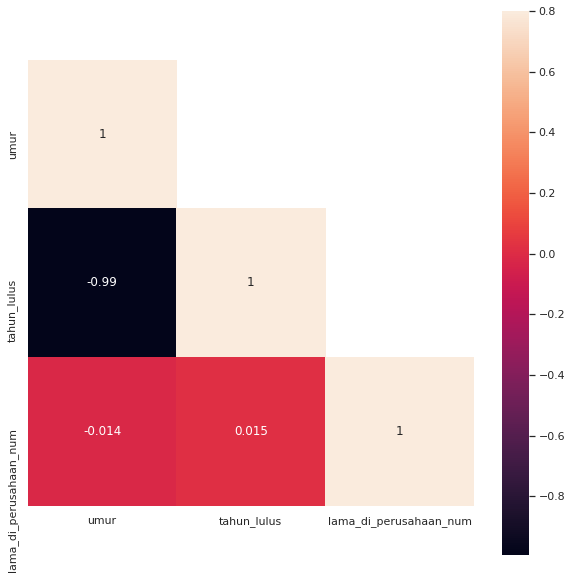

In [141]:
#Mengecek multikolinearitas umur, tahun lulus, lama di perusahaan
df3 = train[['umur','tahun_lulus','lama_di_perusahaan_num']]
corr_df3 = df3.corr(method  = 'pearson')
mask = np.array(corr_df3)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
sns.heatmap(corr_df3, mask = mask, vmax=.8, square=True, annot=True, ax=ax)

In [142]:
df3.corr(method  = 'pearson')

,umur,tahun_lulus,lama_di_perusahaan_num
umur,1.000000,-0.993589,-0.013734
tahun_lulus,-0.993589,1.000000,0.015372
lama_di_perusahaan_num,-0.013734,0.015372,1.000000


In [143]:
#Menghapus kolom umur, tahun lulus, lama di perusahaan - train
#Umur dihapus dan tahun lulus dihapus karena tidak valid
#Lama di perusahaan dihapus karena sudah diganti menjadi numerik
trainrev = train.drop(columns = ['umur','tahun_lulus','lama_di_perusahaan'])

In [144]:
#Menghapus kolom umur, tahun lulus, lama di perusahaan - test
#Umur dihapus dan tahun lulus dihapus karena tidak valid
#Lama di perusahaan dihapus karena sudah diganti menjadi numerik
testrev = test.drop(columns =['umur','tahun_lulus','lama_di_perusahaan'] )

In [145]:
trainrev.head()

,employee_id,jenis_kelamin,IPK,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign,lama_di_perusahaan_num
0,10000,Laki-laki,1.947303,Junior,Sudah Menikah,management,210.0,0.82,0.419035,3,belum pernah,belum,sedang,0,36.0
1,10001,Laki-laki,3.218346,Full-Time,Belum Menikah,sales,189.0,0.76,0.558254,3,belum pernah,belum,rendah,0,24.0
2,10002,Laki-laki,2.117364,Senior,Sudah Menikah,management,NaN,0.81,0.580364,5,pernah,belum,tinggi,0,24.0
3,10003,Laki-laki,3.178748,Full-Time,Belum Menikah,sales,121.0,0.84,0.446109,3,pernah,belum,rendah,0,36.0
4,10004,Laki-laki,2.680535,Part-Time,Belum Menikah,technical,229.0,0.48,NaN,3,belum pernah,belum,rendah,0,36.0


In [146]:
trainrev['lama_di_perusahaan_num'].shape

(10049,)

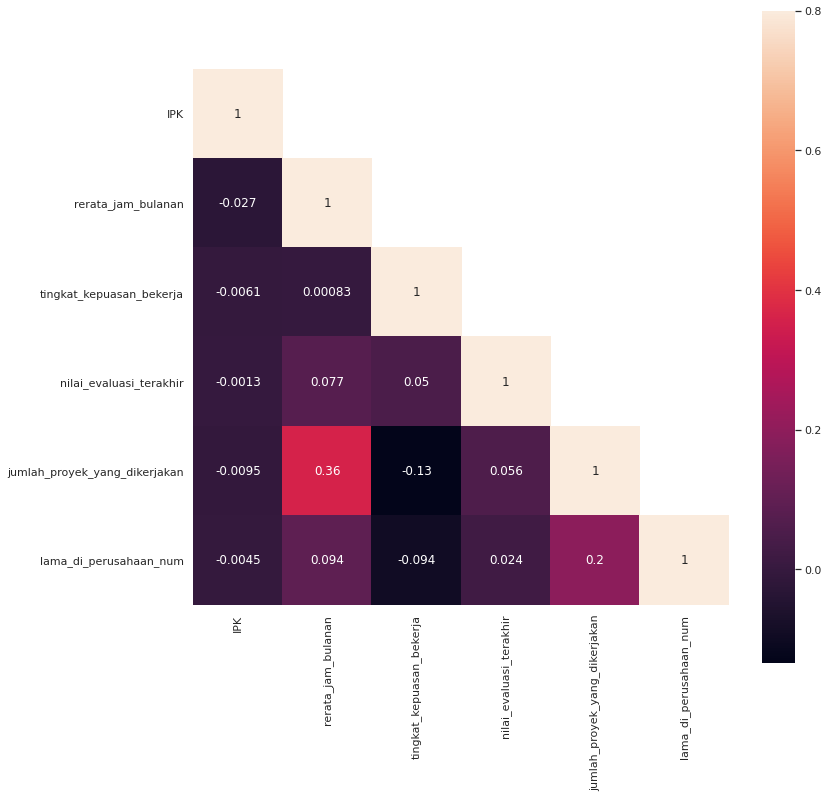

In [147]:
#Mengecek multikolinearitas variabel metrik
corr_columns = ['IPK','rerata_jam_bulanan','tingkat_kepuasan_bekerja','nilai_evaluasi_terakhir','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
corr_trainrev = trainrev[corr_columns].corr(method  = 'pearson')
mask = np.array(corr_trainrev)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
sns.heatmap(corr_trainrev, mask = mask, vmax=.8, square=True, annot=True, ax=ax)

In [148]:
#Resign rate keseluruhan
resign_rate = trainrev.resign.value_counts() / len(trainrev)
resign_rate

0    0.761966
1    0.238034
Name: resign, dtype: float64

In [149]:
#Rata-rata variabel metrik menurut keterangan resign
summ_columns = ['IPK','rerata_jam_bulanan','tingkat_kepuasan_bekerja','nilai_evaluasi_terakhir','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num','resign']
resign_summ = trainrev[summ_columns].groupby('resign')
resign_summ.mean()

,IPK,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan_num
resign,,,,,,
0,2.390667,201.639777,0.663850,0.457113,3.788951,40.674938
1,2.413748,207.283849,0.446072,0.451849,3.825669,46.439799


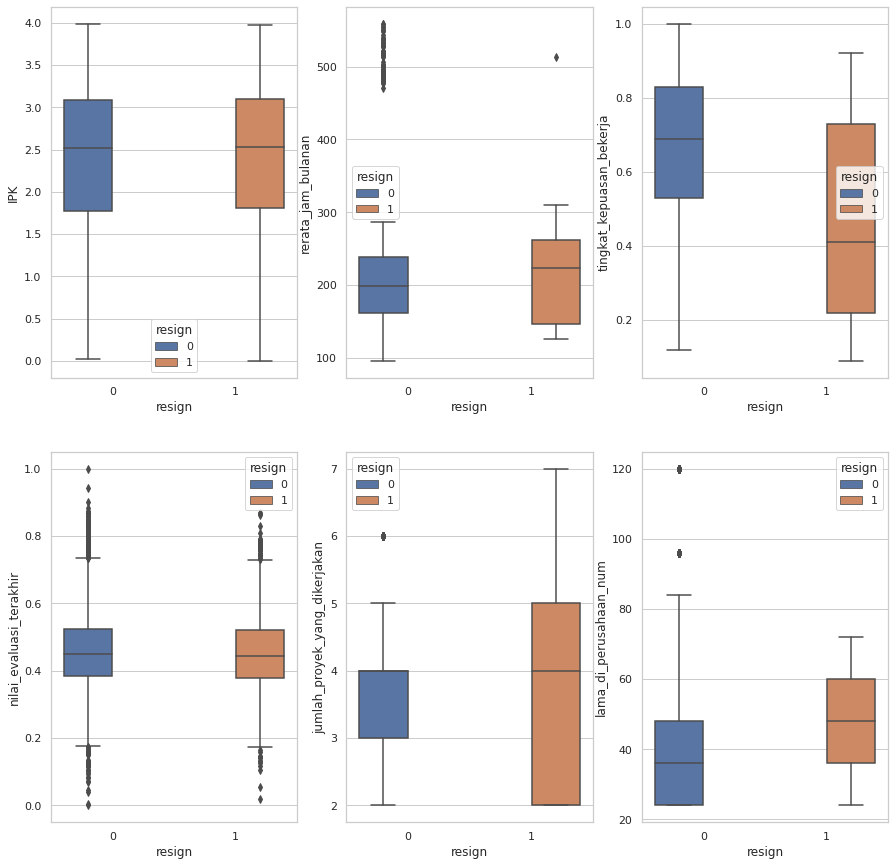

In [150]:
#Boxplot metrik
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
sns.boxplot(x='resign', y='IPK', hue='resign', data=trainrev, ax=axes[0,0])
sns.boxplot(x='resign', y='rerata_jam_bulanan', hue='resign', data=trainrev, ax=axes[0,1])
sns.boxplot(x='resign', y='tingkat_kepuasan_bekerja', hue='resign', data=trainrev, ax=axes[0,2])
sns.boxplot(x='resign', y='nilai_evaluasi_terakhir', hue='resign', data=trainrev, ax=axes[1,0])
sns.boxplot(x='resign', y='jumlah_proyek_yang_dikerjakan', hue='resign', data=trainrev, ax=axes[1,1])
sns.boxplot(x='resign', y='lama_di_perusahaan_num', hue='resign', data=trainrev, ax=axes[1,2])

Eksplorasi Data Numerikal

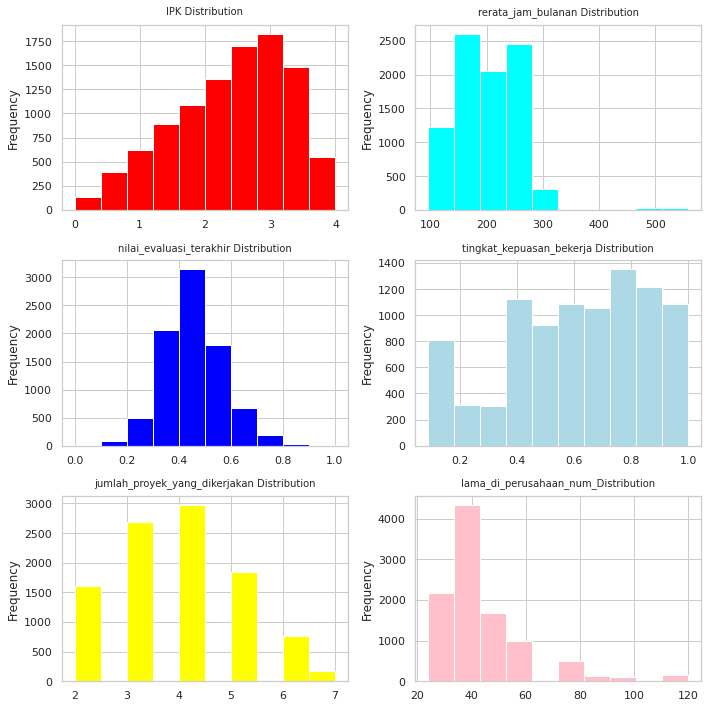

In [151]:
#Histogram variabel metrik keseluruhan
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

trainrev['IPK'].plot(kind='hist', ax=ax1, color = '#FF0000')
trainrev['rerata_jam_bulanan'].plot(kind='hist', ax=ax2, color = '#00FFFF')
trainrev['nilai_evaluasi_terakhir'].plot(kind='hist', ax=ax3, color = '#0000FF')
trainrev['tingkat_kepuasan_bekerja'].plot(kind='hist', ax=ax4, color = '#ADD8E6')
trainrev['jumlah_proyek_yang_dikerjakan'].plot(kind='hist', ax=ax5, color = '#FFFF00')
trainrev['lama_di_perusahaan_num'].plot(kind='hist', ax=ax6, color = '#FFC0CB')

ax1.set_title('IPK Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax2.set_title('rerata_jam_bulanan Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax3.set_title('nilai_evaluasi_terakhir Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax4.set_title('tingkat_kepuasan_bekerja Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax5.set_title('jumlah_proyek_yang_dikerjakan Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax6.set_title('lama_di_perusahaan_num_Distribution', fontdict={'fontsize': '10'}, pad = 10)

fig.tight_layout()

In [152]:
#Uji normalitas variabel metrik
def normaltest(x):
  b = stats.normaltest(x)
  return b

normal = ['IPK','rerata_jam_bulanan','tingkat_kepuasan_bekerja','nilai_evaluasi_terakhir','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']

for i in range(len(normal)):
  print(normal[i],normaltest(trainrev[normal[i]]))

IPK NormaltestResult(statistic=648.3365337132037, pvalue=1.6425193556328638e-141)
rerata_jam_bulanan NormaltestResult(statistic=nan, pvalue=nan)
tingkat_kepuasan_bekerja NormaltestResult(statistic=nan, pvalue=nan)
nilai_evaluasi_terakhir NormaltestResult(statistic=nan, pvalue=nan)
jumlah_proyek_yang_dikerjakan NormaltestResult(statistic=350.25669390917955, pvalue=8.764462613100457e-77)
lama_di_perusahaan_num NormaltestResult(statistic=3806.5835510854095, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


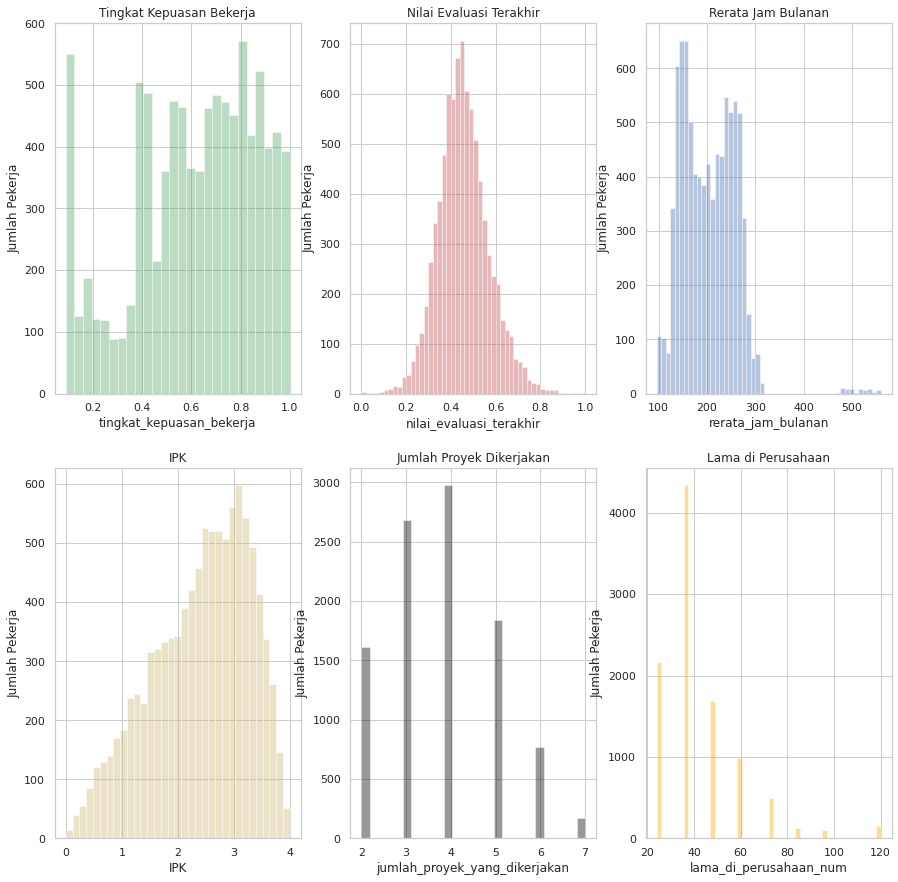

In [153]:
#Histogram variabel metrik keseluruhan
f, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 15))

sns.distplot(trainrev['tingkat_kepuasan_bekerja'], kde=False, color="g", ax=axes[0,0]).set_title('Tingkat Kepuasan Bekerja')
axes[0,0].set_ylabel('Jumlah Pekerja')

sns.distplot(trainrev['nilai_evaluasi_terakhir'], kde=False, color="r", ax=axes[0,1]).set_title('Nilai Evaluasi Terakhir')
axes[0,1].set_ylabel('Jumlah Pekerja')

sns.distplot(trainrev['rerata_jam_bulanan'], kde=False, color="b", ax=axes[0,2]).set_title('Rerata Jam Bulanan')
axes[0,2].set_ylabel('Jumlah Pekerja')

sns.distplot(trainrev['IPK'], kde=False, color="y", ax=axes[1,0]).set_title('IPK')
axes[1,0].set_ylabel('Jumlah Pekerja')

sns.distplot(trainrev['jumlah_proyek_yang_dikerjakan'], kde=False, color="black", ax=axes[1,1]).set_title('Jumlah Proyek Dikerjakan')
axes[1,1].set_ylabel('Jumlah Pekerja')

sns.distplot(trainrev['lama_di_perusahaan_num'], kde=False, color="orange", ax=axes[1,2]).set_title('Lama di Perusahaan')
axes[1,2].set_ylabel('Jumlah Pekerja')

fig.tight_layout()

In [154]:
trainrev.columns

Index(['employee_id', 'jenis_kelamin', 'IPK', 'level', 'status_perkawinan',
       'divisi', 'rerata_jam_bulanan', 'tingkat_kepuasan_bekerja',
       'nilai_evaluasi_terakhir', 'jumlah_proyek_yang_dikerjakan',
       'kecelakaan_kerja', 'promosi_5thn_lalu', 'tingkat_gaji', 'resign',
       'lama_di_perusahaan_num'],
      dtype='object')

In [155]:
df7 = trainrev

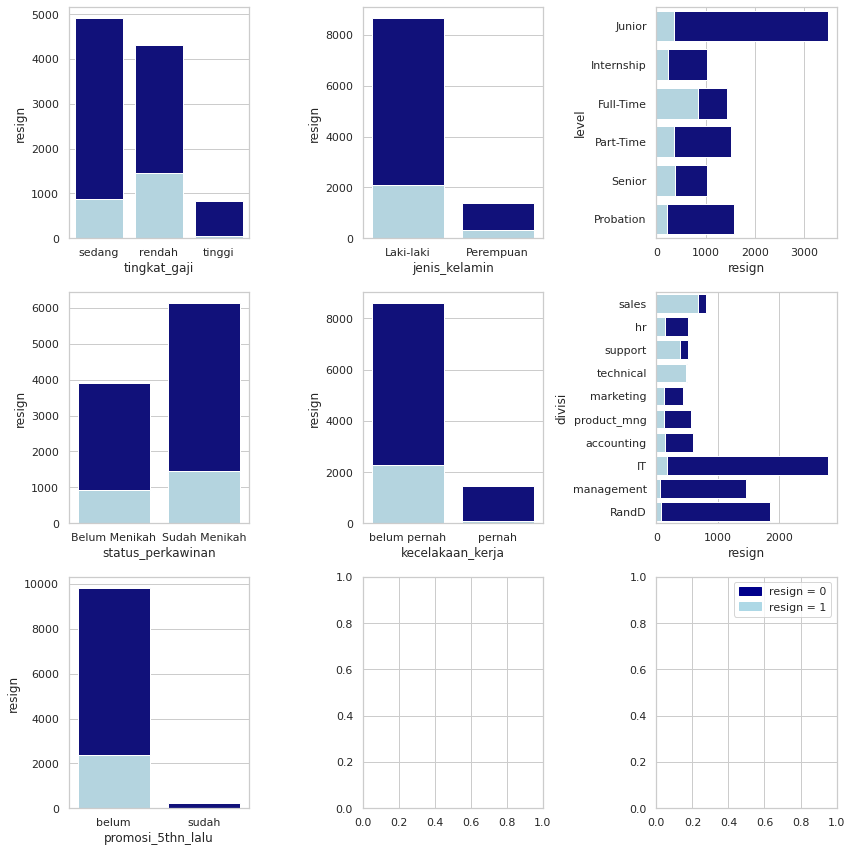

In [156]:
#Stacked barplot variabel kategorikal berdasarkan keterangan resign
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

count1 = df7.groupby('tingkat_gaji')['resign'].count().reset_index()
count2 = df7.groupby('jenis_kelamin')['resign'].count().reset_index()
count3 = df7.groupby('level')['resign'].count().reset_index()
count4 = df7.groupby('status_perkawinan')['resign'].count().reset_index()
count5 = df7.groupby('divisi')['resign'].count().reset_index()
count6 = df7.groupby('kecelakaan_kerja')['resign'].count().reset_index()
count7 = df7.groupby('promosi_5thn_lalu')['resign'].count().reset_index()

resign = df7[df7['resign'] == 1]

p1 = sns.barplot(x='tingkat_gaji',  y='resign', data=count1, color='darkblue', ax=axes[0,0])
p1 = sns.barplot(x='tingkat_gaji', y='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[0,0])

sns.barplot(x='jenis_kelamin',  y='resign', data=count2, color='darkblue', ax=axes[0,1])
sns.barplot(x='jenis_kelamin', y='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[0,1])

sns.barplot(y='level',  x='resign', data=count3, color='darkblue', ax=axes[0,2])
sns.barplot(y='level', x='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[0,2])

sns.barplot(x='status_perkawinan',  y='resign', data=count4, color='darkblue', ax=axes[1,0])
sns.barplot(x='status_perkawinan', y='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[1,0])

sns.barplot(y='divisi',  x='resign', data=count5, color='darkblue', ax=axes[1,2])
sns.barplot(y='divisi', x='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[1,2])

sns.barplot(x='kecelakaan_kerja',  y='resign', data=count6, color='darkblue', ax=axes[1,1])
sns.barplot(x='kecelakaan_kerja', y='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[1,1])

sns.barplot(x='promosi_5thn_lalu',  y='resign', data=count7, color='darkblue', ax=axes[2,0])
sns.barplot(x='promosi_5thn_lalu', y='resign', data=resign, estimator = sum, ci = None, color='lightblue', ax=axes[2,0])

top_bar = mpatches.Patch(color='darkblue', label='resign = 0')
bottom_bar = mpatches.Patch(color='lightblue', label='resign = 1')
plt.legend(handles=[top_bar, bottom_bar])

fig.tight_layout()

In [157]:
#korelasi dan scatter plot

In [158]:
#bikin histogram buat: 1. keseluruhan variabel numerik ; 2. variabel numerik tsb saat resign = 0 ; 3. variabel numerik tsb saat resign = 1

Resign = 0

In [159]:
df5 = trainrev[trainrev['resign'] == 0]
df5.shape

(7657, 15)

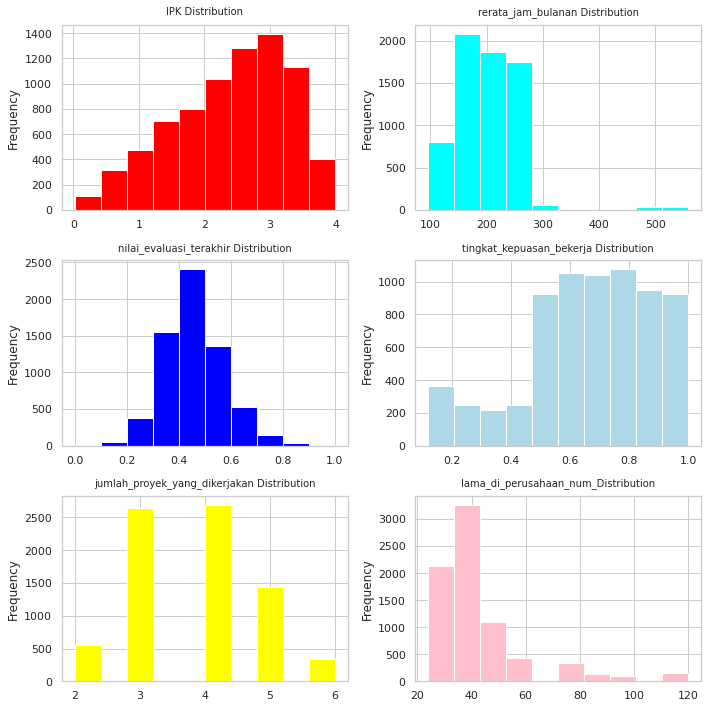

In [160]:
#Histogram variabel metrik
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

df5['IPK'].plot(kind='hist', ax=ax1, color = '#FF0000')
df5['rerata_jam_bulanan'].plot(kind='hist', ax=ax2, color = '#00FFFF')
df5['nilai_evaluasi_terakhir'].plot(kind='hist', ax=ax3, color = '#0000FF')
df5['tingkat_kepuasan_bekerja'].plot(kind='hist', ax=ax4, color = '#ADD8E6')
df5['jumlah_proyek_yang_dikerjakan'].plot(kind='hist', ax=ax5, color = '#FFFF00')
df5['lama_di_perusahaan_num'].plot(kind='hist', ax=ax6, color = '#FFC0CB')

ax1.set_title('IPK Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax2.set_title('rerata_jam_bulanan Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax3.set_title('nilai_evaluasi_terakhir Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax4.set_title('tingkat_kepuasan_bekerja Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax5.set_title('jumlah_proyek_yang_dikerjakan Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax6.set_title('lama_di_perusahaan_num_Distribution', fontdict={'fontsize': '10'}, pad = 10)


fig.tight_layout()

Resign  = 1

In [161]:
df6 = trainrev[trainrev['resign'] == 1]
df6.shape

(2392, 15)

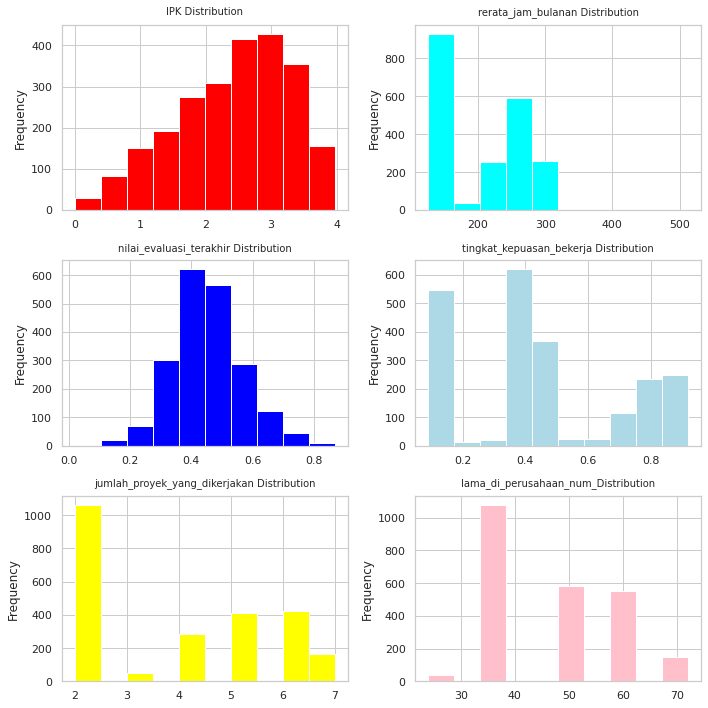

In [162]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

df6['IPK'].plot(kind='hist', ax=ax1, color = '#FF0000')
df6['rerata_jam_bulanan'].plot(kind='hist', ax=ax2, color = '#00FFFF')
df6['nilai_evaluasi_terakhir'].plot(kind='hist', ax=ax3, color = '#0000FF')
df6['tingkat_kepuasan_bekerja'].plot(kind='hist', ax=ax4, color = '#ADD8E6')
df6['jumlah_proyek_yang_dikerjakan'].plot(kind='hist', ax=ax5, color = '#FFFF00')
df6['lama_di_perusahaan_num'].plot(kind='hist', ax=ax6, color = '#FFC0CB')

ax1.set_title('IPK Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax2.set_title('rerata_jam_bulanan Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax3.set_title('nilai_evaluasi_terakhir Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax4.set_title('tingkat_kepuasan_bekerja Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax5.set_title('jumlah_proyek_yang_dikerjakan Distribution', fontdict={'fontsize': '10'}, pad = 10)
ax6.set_title('lama_di_perusahaan_num_Distribution', fontdict={'fontsize': '10'}, pad = 10)


fig.tight_layout()

Eksplorasi Data Kategorikal

In [163]:
#visualisasi bar chart. count aja per kolom

# **Data Preparation**



In [164]:
#data cleaning

In [165]:
#1. hapus dataset missing value disesuain sama nilai evaluasi terakhir

In [166]:
df4 = trainrev
df4.head()

,employee_id,jenis_kelamin,IPK,level,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign,lama_di_perusahaan_num
0,10000,Laki-laki,1.947303,Junior,Sudah Menikah,management,210.0,0.82,0.419035,3,belum pernah,belum,sedang,0,36.0
1,10001,Laki-laki,3.218346,Full-Time,Belum Menikah,sales,189.0,0.76,0.558254,3,belum pernah,belum,rendah,0,24.0
2,10002,Laki-laki,2.117364,Senior,Sudah Menikah,management,NaN,0.81,0.580364,5,pernah,belum,tinggi,0,24.0
3,10003,Laki-laki,3.178748,Full-Time,Belum Menikah,sales,121.0,0.84,0.446109,3,pernah,belum,rendah,0,36.0
4,10004,Laki-laki,2.680535,Part-Time,Belum Menikah,technical,229.0,0.48,NaN,3,belum pernah,belum,rendah,0,36.0


In [167]:
#Imputasi missing data menggunakan mean - train
from sklearn.impute import SimpleImputer
rerata = SimpleImputer(strategy='mean')
trainrev['rerata_jam_bulanan'] = rerata.fit_transform(trainrev['rerata_jam_bulanan'].values.reshape(-1,1))
trainrev['nilai_evaluasi_terakhir'] = rerata.fit_transform(trainrev['nilai_evaluasi_terakhir'].values.reshape(-1,1))
trainrev['tingkat_kepuasan_bekerja'] = rerata.fit_transform(trainrev['tingkat_kepuasan_bekerja'].values.reshape(-1,1))

In [168]:
testrev.isna().sum()

employee_id                        0
jenis_kelamin                      0
IPK                                0
level                              0
status_perkawinan                  0
divisi                             0
rerata_jam_bulanan               588
tingkat_kepuasan_bekerja         466
nilai_evaluasi_terakhir          856
jumlah_proyek_yang_dikerjakan      0
kecelakaan_kerja                   0
promosi_5thn_lalu                  0
tingkat_gaji                       0
lama_di_perusahaan_num             0
dtype: int64

In [169]:
#Imputasi missing data menggunakan mean - test
from sklearn.impute import SimpleImputer
rerata = SimpleImputer(strategy='mean')
testrev['rerata_jam_bulanan'] = rerata.fit_transform(testrev['rerata_jam_bulanan'].values.reshape(-1,1))
testrev['nilai_evaluasi_terakhir'] = rerata.fit_transform(testrev['nilai_evaluasi_terakhir'].values.reshape(-1,1))
testrev['tingkat_kepuasan_bekerja'] = rerata.fit_transform(testrev['tingkat_kepuasan_bekerja'].values.reshape(-1,1))

In [170]:
testrev.isna().sum()

employee_id                      0
jenis_kelamin                    0
IPK                              0
level                            0
status_perkawinan                0
divisi                           0
rerata_jam_bulanan               0
tingkat_kepuasan_bekerja         0
nilai_evaluasi_terakhir          0
jumlah_proyek_yang_dikerjakan    0
kecelakaan_kerja                 0
promosi_5thn_lalu                0
tingkat_gaji                     0
lama_di_perusahaan_num           0
dtype: int64

In [171]:
#2. isi missing value pake mean

In [172]:
#uji normalitas ulang

In [173]:
#Menghapus variabel tidak relevan
modeltrainrev = trainrev.drop(columns = ['employee_id','jenis_kelamin','status_perkawinan','IPK','nilai_evaluasi_terakhir'])
modeltestrev = testrev.drop(columns = ['employee_id','jenis_kelamin','status_perkawinan','IPK','nilai_evaluasi_terakhir'])

In [174]:
print(modeltrainrev.shape)
print(modeltestrev.shape)

(10049, 10)
(4950, 9)


In [175]:
#Normalisasi variabel metrik - train
from sklearn.preprocessing import MinMaxScaler
scaled_cols = ['rerata_jam_bulanan', 'jumlah_proyek_yang_dikerjakan', 'lama_di_perusahaan_num']
scaler = MinMaxScaler()
scaler.fit(modeltrainrev[scaled_cols])
modeltrainrev[scaled_cols] = scaler.transform(modeltrainrev[scaled_cols])

In [176]:
#Normalisasi variabel metrik - test
scaler.fit(modeltestrev[scaled_cols])
modeltestrev[scaled_cols] = scaler.transform(modeltestrev[scaled_cols])

In [177]:
modeltrainrev.describe()

,rerata_jam_bulanan,tingkat_kepuasan_bekerja,jumlah_proyek_yang_dikerjakan,resign,lama_di_perusahaan_num
count,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000
mean,0.231061,0.611906,0.359538,0.238034,0.187991
std,0.113962,0.237921,0.245466,0.425901,0.183967
min,0.000000,0.090000,0.000000,0.000000,0.000000
25%,0.138229,0.450000,0.200000,0.000000,0.125000
50%,0.231061,0.611906,0.400000,0.000000,0.125000
75%,0.311015,0.800000,0.600000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
modeltestrev.describe()

,rerata_jam_bulanan,tingkat_kepuasan_bekerja,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan_num
count,4950.000000,4950.000000,4950.000000,4950.000000
mean,0.230843,0.612132,0.362788,0.185833
std,0.109659,0.237699,0.248652,0.179547
min,0.000000,0.090000,0.000000,0.000000
25%,0.138528,0.460000,0.200000,0.125000
50%,0.230843,0.612132,0.400000,0.125000
75%,0.313853,0.800000,0.600000,0.250000
max,1.000000,1.000000,1.000000,1.000000


In [179]:
#Membuat variabel dummy untuk kategorikal - train
catt = ['level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji','resign']
numm = ['rerata_jam_bulanan','tingkat_kepuasan_bekerja','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
categorical_df = pd.get_dummies(modeltrainrev[catt], drop_first=True)
numerical_df = modeltrainrev[numm]

modeldf = pd.concat([categorical_df,numerical_df], axis=1)
modeldf.head()

,resign,level_Internship,level_Junior,level_Part-Time,level_Probation,level_Senior,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical,kecelakaan_kerja_pernah,promosi_5thn_lalu_sudah,tingkat_gaji_sedang,tingkat_gaji_tinggi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan_num
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.246220,0.82,0.2,0.125
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.200864,0.76,0.2,0.000
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0.231061,0.81,0.6,0.000
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.053996,0.84,0.2,0.125
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.287257,0.48,0.2,0.125


In [180]:
#Membuat variabel dummy untuk kategorikal - test
catttest = ['level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']
nummtest = ['rerata_jam_bulanan','tingkat_kepuasan_bekerja','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
categorical_dftest = pd.get_dummies(modeltestrev[catttest], drop_first=True)
numerical_dftest = modeltestrev[nummtest]

modeldftest = pd.concat([categorical_dftest,numerical_dftest], axis=1)
modeldftest.head()

,level_Internship,level_Junior,level_Part-Time,level_Probation,level_Senior,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical,kecelakaan_kerja_pernah,promosi_5thn_lalu_sudah,tingkat_gaji_sedang,tingkat_gaji_tinggi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan_num
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.086580,0.38,0.0,0.125
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.348485,0.85,0.2,0.125
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.346320,0.91,0.2,0.125
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.097403,0.42,0.0,0.125
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.378788,0.93,0.2,0.000


**Metode Baru**

Dataset train

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    10049 non-null  int64  
 1   umur                           2338 non-null   float64
 2   jenis_kelamin                  10049 non-null  object 
 3   IPK                            10049 non-null  float64
 4   level                          10049 non-null  object 
 5   tahun_lulus                    2338 non-null   float64
 6   status_perkawinan              10049 non-null  object 
 7   divisi                         10049 non-null  object 
 8   rerata_jam_bulanan             8700 non-null   float64
 9   tingkat_kepuasan_bekerja       9253 non-null   float64
 10  nilai_evaluasi_terakhir        8499 non-null   float64
 11  jumlah_proyek_yang_dikerjakan  10049 non-null  int64  
 12  lama_di_perusahaan             10049 non-null 

In [182]:
#Menghapus variabel tidak relevan
train0 = train.drop(columns = ['umur','tahun_lulus','lama_di_perusahaan'])
train1 = train0.drop(columns = ['employee_id','jenis_kelamin','status_perkawinan','IPK','nilai_evaluasi_terakhir'])
#Dataset train versi drop
train2 = train1.dropna(how='any')
print(train2.shape)

(8018, 10)


In [183]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8018 entries, 0 to 10048
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level                          8018 non-null   object 
 1   divisi                         8018 non-null   object 
 2   rerata_jam_bulanan             8018 non-null   float64
 3   tingkat_kepuasan_bekerja       8018 non-null   float64
 4   jumlah_proyek_yang_dikerjakan  8018 non-null   int64  
 5   kecelakaan_kerja               8018 non-null   object 
 6   promosi_5thn_lalu              8018 non-null   object 
 7   tingkat_gaji                   8018 non-null   object 
 8   resign                         8018 non-null   int64  
 9   lama_di_perusahaan_num         8018 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 689.0+ KB


In [184]:
#Normalisasi variabel metrik - train
modeltraindrop = train2
scaler = MinMaxScaler()
scaler.fit(modeltraindrop[scaled_cols])
modeltraindrop[scaled_cols] = scaler.transform(modeltraindrop[scaled_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [185]:
catttest = ['resign','level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']
nummtest = ['rerata_jam_bulanan','tingkat_kepuasan_bekerja','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
categorical_dftest = pd.get_dummies(modeltraindrop[catttest], drop_first=True)
numerical_dftest = modeltraindrop[nummtest]
modeltraindrop = pd.concat([categorical_dftest,numerical_dftest], axis=1)
modeltraindrop.head()
modeltraindrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8018 entries, 0 to 10048
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resign                         8018 non-null   int64  
 1   level_Internship               8018 non-null   uint8  
 2   level_Junior                   8018 non-null   uint8  
 3   level_Part-Time                8018 non-null   uint8  
 4   level_Probation                8018 non-null   uint8  
 5   level_Senior                   8018 non-null   uint8  
 6   divisi_RandD                   8018 non-null   uint8  
 7   divisi_accounting              8018 non-null   uint8  
 8   divisi_hr                      8018 non-null   uint8  
 9   divisi_management              8018 non-null   uint8  
 10  divisi_marketing               8018 non-null   uint8  
 11  divisi_product_mng             8018 non-null   uint8  
 12  divisi_sales                   8018 non-null   

Ngebagi dataset test

In [186]:
#Normalisasi variabel metrik - train
a = test
catttest = ['resign','level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']
nummtest = ['rerata_jam_bulanan','tingkat_kepuasan_bekerja','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
scaler = MinMaxScaler()
scaler.fit(a[scaled_cols])
a[scaled_cols] = scaler.transform(a[scaled_cols])

In [187]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    4950 non-null   int64  
 1   umur                           1070 non-null   float64
 2   jenis_kelamin                  4950 non-null   object 
 3   IPK                            4950 non-null   float64
 4   level                          4950 non-null   object 
 5   tahun_lulus                    1151 non-null   float64
 6   status_perkawinan              4950 non-null   object 
 7   divisi                         4950 non-null   object 
 8   rerata_jam_bulanan             4362 non-null   float64
 9   tingkat_kepuasan_bekerja       4484 non-null   float64
 10  nilai_evaluasi_terakhir        4094 non-null   float64
 11  jumlah_proyek_yang_dikerjakan  4950 non-null   float64
 12  lama_di_perusahaan             4950 non-null   o

Tanpa Missing Value

In [188]:
#Row tanpa missing value
#Menghapus kolom tidak relevan
c = a
c = c.drop(columns = ['umur','tahun_lulus','lama_di_perusahaan'])
c1 = c.dropna(how='any')
c1e = c1
#Membuat variabel dummy untuk kategorikal - test
catttest = ['level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']
nummtest = ['rerata_jam_bulanan','tingkat_kepuasan_bekerja','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
categorical_dftest = pd.get_dummies(c1[catttest], drop_first=True)
numerical_dftest = c1[nummtest]
c1 = pd.concat([categorical_dftest,numerical_dftest], axis=1)
c1.head()
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 4949
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_Internship               3269 non-null   uint8  
 1   level_Junior                   3269 non-null   uint8  
 2   level_Part-Time                3269 non-null   uint8  
 3   level_Probation                3269 non-null   uint8  
 4   level_Senior                   3269 non-null   uint8  
 5   divisi_RandD                   3269 non-null   uint8  
 6   divisi_accounting              3269 non-null   uint8  
 7   divisi_hr                      3269 non-null   uint8  
 8   divisi_management              3269 non-null   uint8  
 9   divisi_marketing               3269 non-null   uint8  
 10  divisi_product_mng             3269 non-null   uint8  
 11  divisi_sales                   3269 non-null   uint8  
 12  divisi_support                 3269 non-null   u

In [189]:
#Mengambil row dengan missing value
b = a[(a["tingkat_kepuasan_bekerja"].isna())|(a["rerata_jam_bulanan"].isna())|(a["nilai_evaluasi_terakhir"].isna())]
#Menghapus kolom tidak relevan
b1 = b.drop(columns = ['umur','tahun_lulus','lama_di_perusahaan'])

In [190]:
meanRJB = a["rerata_jam_bulanan"].mean()
print(meanRJB)

0.23084251832532388


In [191]:
print(b1.isna().sum())
print(b1.shape)

employee_id                        0
jenis_kelamin                      0
IPK                                0
level                              0
status_perkawinan                  0
divisi                             0
rerata_jam_bulanan               588
tingkat_kepuasan_bekerja         466
nilai_evaluasi_terakhir          856
jumlah_proyek_yang_dikerjakan      0
kecelakaan_kerja                   0
promosi_5thn_lalu                  0
tingkat_gaji                       0
lama_di_perusahaan_num             0
dtype: int64
(1681, 14)


Missing value non TKB

In [192]:
b2 = b1[b1["tingkat_kepuasan_bekerja"].notna()]
b2e = b2
#Membuat variabel dummy untuk kategorikal - test
catttest = ['level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']
nummtest = ['tingkat_kepuasan_bekerja','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
categorical_dftest = pd.get_dummies(b2[catttest], drop_first=True)
numerical_dftest = b2[nummtest]
b2 = pd.concat([categorical_dftest,numerical_dftest], axis=1)
b2.head()
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 7 to 4948
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_Internship               1215 non-null   uint8  
 1   level_Junior                   1215 non-null   uint8  
 2   level_Part-Time                1215 non-null   uint8  
 3   level_Probation                1215 non-null   uint8  
 4   level_Senior                   1215 non-null   uint8  
 5   divisi_RandD                   1215 non-null   uint8  
 6   divisi_accounting              1215 non-null   uint8  
 7   divisi_hr                      1215 non-null   uint8  
 8   divisi_management              1215 non-null   uint8  
 9   divisi_marketing               1215 non-null   uint8  
 10  divisi_product_mng             1215 non-null   uint8  
 11  divisi_sales                   1215 non-null   uint8  
 12  divisi_support                 1215 non-null   u

Missing Value TKB

In [193]:
b3 = b1[b1["tingkat_kepuasan_bekerja"].isna()]
b4e=b3
#Membuat variabel dummy untuk kategorikal - test
catttest = ['level','divisi','kecelakaan_kerja','promosi_5thn_lalu','tingkat_gaji']
nummtest = ['rerata_jam_bulanan','jumlah_proyek_yang_dikerjakan','lama_di_perusahaan_num']
categorical_dftest = pd.get_dummies(b3[catttest], drop_first=True)
numerical_dftest = b3[nummtest]
b3 = pd.concat([categorical_dftest,numerical_dftest], axis=1)
b3.head()
b3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 5 to 4936
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_Internship               466 non-null    uint8  
 1   level_Junior                   466 non-null    uint8  
 2   level_Part-Time                466 non-null    uint8  
 3   level_Probation                466 non-null    uint8  
 4   level_Senior                   466 non-null    uint8  
 5   divisi_RandD                   466 non-null    uint8  
 6   divisi_accounting              466 non-null    uint8  
 7   divisi_hr                      466 non-null    uint8  
 8   divisi_management              466 non-null    uint8  
 9   divisi_marketing               466 non-null    uint8  
 10  divisi_product_mng             466 non-null    uint8  
 11  divisi_sales                   466 non-null    uint8  
 12  divisi_support                 466 non-null    ui

In [194]:
#Imputasi missing data menggunakan mean - test
from sklearn.impute import SimpleImputer
RJB = SimpleImputer(strategy='constant',fill_value=meanRJB)
b3['rerata_jam_bulanan'] = RJB.fit_transform(b3['rerata_jam_bulanan'].values.reshape(-1,1))

In [195]:
b4 = b3
b4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 5 to 4936
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_Internship               466 non-null    uint8  
 1   level_Junior                   466 non-null    uint8  
 2   level_Part-Time                466 non-null    uint8  
 3   level_Probation                466 non-null    uint8  
 4   level_Senior                   466 non-null    uint8  
 5   divisi_RandD                   466 non-null    uint8  
 6   divisi_accounting              466 non-null    uint8  
 7   divisi_hr                      466 non-null    uint8  
 8   divisi_management              466 non-null    uint8  
 9   divisi_marketing               466 non-null    uint8  
 10  divisi_product_mng             466 non-null    uint8  
 11  divisi_sales                   466 non-null    uint8  
 12  divisi_support                 466 non-null    ui

# **Modelling**

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Missing value TKB - imputasi

In [197]:
#Penentuan y
target_name = 'resign'
X = modeldf.drop('resign', axis = 1)
X = X.drop('tingkat_kepuasan_bekerja', axis = 1)
y = modeldf[target_name]
#Ukuran train untuk pembuatan model
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1, random_state=42)

Missing Value non TKB

In [243]:
#Penentuan y
target_name = 'resign'
X = modeltraindrop.drop('resign', axis = 1)
X = X.drop('rerata_jam_bulanan', axis = 1)
y = modeltraindrop[target_name]
#Ukuran train untuk pembuatan model
X_train2, X_val2, y_train2, y_val2 = train_test_split(X,y,test_size=0.1, random_state=42)

No Missing Value

In [199]:
#Penentuan y
target_name = 'resign'
X = modeltraindrop.drop('resign', axis = 1)
y = modeltraindrop[target_name]
#Ukuran train untuk pembuatan model
X_train3, X_val3, y_train3, y_val3 = train_test_split(X,y,test_size=0.1, random_state=42)

## Random Forest Classifier

In [244]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 7 to 4948
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_Internship               1215 non-null   uint8  
 1   level_Junior                   1215 non-null   uint8  
 2   level_Part-Time                1215 non-null   uint8  
 3   level_Probation                1215 non-null   uint8  
 4   level_Senior                   1215 non-null   uint8  
 5   divisi_RandD                   1215 non-null   uint8  
 6   divisi_accounting              1215 non-null   uint8  
 7   divisi_hr                      1215 non-null   uint8  
 8   divisi_management              1215 non-null   uint8  
 9   divisi_marketing               1215 non-null   uint8  
 10  divisi_product_mng             1215 non-null   uint8  
 11  divisi_sales                   1215 non-null   uint8  
 12  divisi_support                 1215 non-null   u

In [246]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 7190 to 9118
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_Internship               7216 non-null   uint8  
 1   level_Junior                   7216 non-null   uint8  
 2   level_Part-Time                7216 non-null   uint8  
 3   level_Probation                7216 non-null   uint8  
 4   level_Senior                   7216 non-null   uint8  
 5   divisi_RandD                   7216 non-null   uint8  
 6   divisi_accounting              7216 non-null   uint8  
 7   divisi_hr                      7216 non-null   uint8  
 8   divisi_management              7216 non-null   uint8  
 9   divisi_marketing               7216 non-null   uint8  
 10  divisi_product_mng             7216 non-null   uint8  
 11  divisi_sales                   7216 non-null   uint8  
 12  divisi_support                 7216 non-null 

### Missing value TKB - imputasi

In [247]:
#Pembuatan model - semua variabel
rf = RandomForestClassifier(
    criterion='gini',
    class_weight="balanced"
    )
rf.fit(X_train, y_train)
print ("---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_val, rf.predict(X_val))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_val, rf.predict(X_val)))

---Random Forest Model---
Random Forest AUC = 0.91
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       755
           1       0.86      0.86      0.86       250

    accuracy                           0.93      1005
   macro avg       0.91      0.91      0.91      1005
weighted avg       0.93      0.93      0.93      1005



In [248]:
pred = rf.predict(X_val)
print("Accuracy score")
print(accuracy_score(y_val,pred))
print("ROC AUC Score")
print(roc_auc_score(y_val,pred))

Accuracy score
0.9313432835820895
ROC AUC Score
0.9088211920529801


In [249]:
#Pembuatan prediksi
predictions = rf.predict(b4)

In [250]:
#Output
output = pd.DataFrame({'employee_id':b4e.employee_id,'resign':predictions})
output.to_csv('modelbaru_1(15pm)).csv',index = False)

In [251]:
output

,employee_id,resign
5,20054,0
32,20081,0
33,20082,0
36,20085,0
74,20123,0
...,...,...
4893,24942,0
4913,24962,0
4921,24970,0
4924,24973,0


In [252]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,lama_di_perusahaan_num,0.307668
1,jumlah_proyek_yang_dikerjakan,0.291238
2,rerata_jam_bulanan,0.250797
3,kecelakaan_kerja_pernah,0.025633
4,tingkat_gaji_tinggi,0.017701
5,tingkat_gaji_sedang,0.014154
6,level_Senior,0.008712
7,level_Junior,0.008518
8,divisi_sales,0.008491
9,level_Part-Time,0.008204


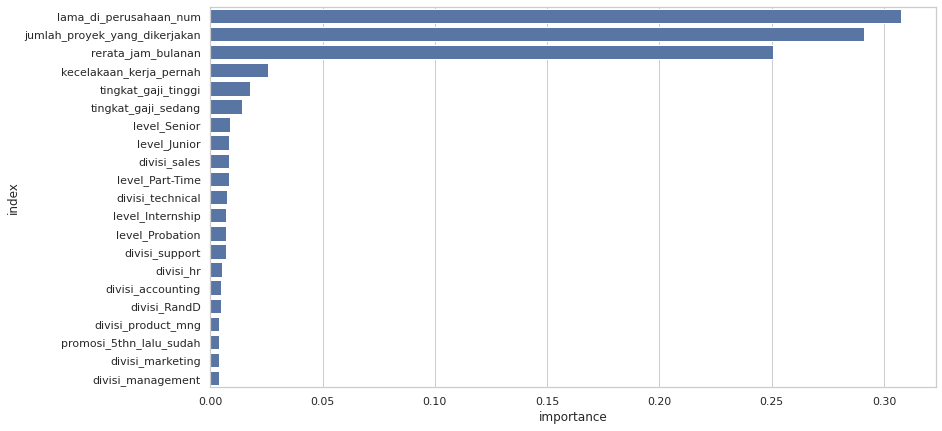

In [253]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

### Missing Value TKB - No Imputasi

In [254]:
#Pembuatan model - semua variabel
rf2 = RandomForestClassifier(
    criterion='entropy',
    class_weight="balanced"
    )
rf2.fit(X_train2, y_train2)
print ("---Random Forest Model---")
rf2_roc_auc = roc_auc_score(y_val2, rf2.predict(X_val2))
print ("Random Forest AUC = %2.2f" % rf2_roc_auc)
print(classification_report(y_val2, rf2.predict(X_val2)))

---Random Forest Model---
Random Forest AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       616
           1       0.95      0.89      0.92       186

    accuracy                           0.96       802
   macro avg       0.96      0.94      0.95       802
weighted avg       0.96      0.96      0.96       802



In [255]:
#Pembuatan prediksi
predictions2 = rf2.predict(b2)

In [256]:
#Output
output2 = pd.DataFrame({'employee_id':b2e.employee_id,'resign':predictions2})
output2.to_csv('modelbaru_2(15pm)).csv',index = False)

### No Missing Value - No imputasi

In [257]:
#Pembuatan model - semua variabel
rf3 = RandomForestClassifier(
    criterion='entropy',
    class_weight="balanced"
    )
rf3.fit(X_train3, y_train3)
print ("---Random Forest Model---")
rf3_roc_auc = roc_auc_score(y_val3, rf3.predict(X_val3))
print ("Random Forest AUC = %2.2f" % rf3_roc_auc)
print(classification_report(y_val3, rf3.predict(X_val3)))

---Random Forest Model---
Random Forest AUC = 0.95
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       616
           1       0.97      0.91      0.94       186

    accuracy                           0.97       802
   macro avg       0.97      0.95      0.96       802
weighted avg       0.97      0.97      0.97       802



In [258]:
#Pembuatan prediksi
predictions = rf3.predict(c1)

In [259]:
#Output
output3 = pd.DataFrame({'employee_id':c1e.employee_id,'resign':predictions})
output3.to_csv('modelbaru_3(15pm)).csv',index = False)

In [260]:
outputall = pd.concat([output,output2,output3],ignore_index=True)

In [267]:
#Output
outputall.to_csv('modelbaru_all(9pm)).csv',index = False)

In [268]:
outputall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   employee_id  4950 non-null   int64
 1   resign       4950 non-null   int64
dtypes: int64(2)
memory usage: 77.5 KB


In [269]:
print(output.shape)
print(output2.shape)
print(output3.shape)

(466, 2)
(1215, 2)
(3269, 2)


In [270]:
outputall.groupby("resign").size()

resign
0    3828
1    1122
dtype: int64

In [265]:
1122/4950

0.22666666666666666